# W207-Spring 2017: Final Project :: Linear Models
### Danish Iqbal, KC Tobin, Jason Vantomme

___________

We begin by importing the necessary functions required to test the various linear models we wish to examine and the data gathered from the feature engineering notebook. We will be looking at the following models.

- Linear Regression
- Lasso (l1)
- Ridge (l2)

We utilized Recursive Feature Extraction (RFE) on each of these models to determine the features that would generate the lowest error (RMSE).

While our original approach to Feature Engineering produced sensible (though not the strongest) values for Linear Regression, our revised FE approach did not produce sensible Linear Regression results; these results were not included in our final prediction.

In [4]:
# ENVIRONMENT SETUP

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

import datetime as dt
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import preprocessing, metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.precision',6)
pd.set_option('display.max_columns',None) 
pd.set_option('display.max_rows',None) 
pd.set_option('display.max_colwidth',1000)

In [5]:
## Load Feature Engineered Data
fe_train = pd.read_csv('data/train_fe.csv')
fe_train_labels = fe_train["SalePrice"].copy()
fe_train = fe_train.drop(["SalePrice"], axis=1)

train, dev, train_labels, dev_labels = train_test_split(fe_train,fe_train_labels,train_size=.5,random_state=207)

# train_labels = np.log(train_labels)
# dev_labels = np.log(dev_labels)
# fe_train_labels = np.log(fe_train_labels)

print "TRAIN DATA: ", train.shape
print "TRAIN LABELS: ", train_labels.shape
print            
print "DEV DATA: ", dev.shape
print "DEV LABELS: ", dev_labels.shape
print

test = pd.read_csv('data/test_fe.csv')
print "TEST DATA: ", test.shape

TRAIN DATA:  (730, 282)
TRAIN LABELS:  (730,)

DEV DATA:  (730, 282)
DEV LABELS:  (730,)

TEST DATA:  (1459, 282)


BEFORE DEV RMSE: -0.15853510315

Optimal # of features : 95


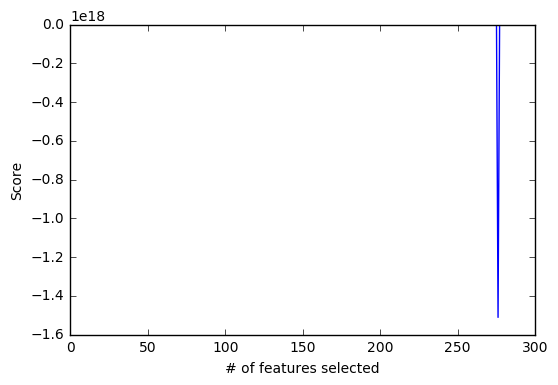

AFTER DEV RMSE: -135973482548.0


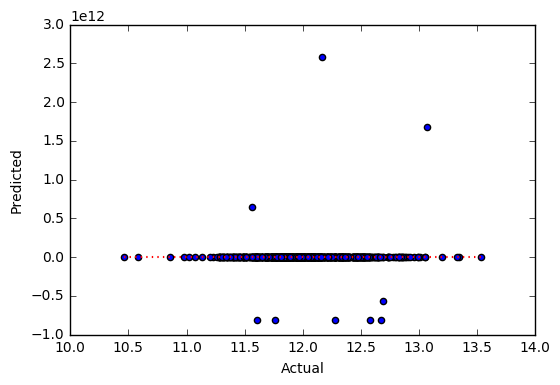

In [6]:
###Linear Regression

clf = LinearRegression()
clf.fit(train, train_labels)
rmse = -np.sqrt(mean_squared_error(clf.predict(dev), dev_labels))
print("BEFORE DEV RMSE: " + str(rmse))
print
rfecv = RFECV(estimator=clf, step=1, cv=5)
rfecv.fit(fe_train, fe_train_labels)
print("Optimal # of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("# of features selected")
plt.ylabel("Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

feature_mask = rfecv.ranking_ == 1
local_dev = dev.iloc[:, feature_mask].copy()
local_train = train.iloc[:, feature_mask].copy()
clf.fit(local_train, train_labels)

dev_predict = clf.predict(local_dev)
rmse = -np.sqrt(mean_squared_error(dev_predict, dev_labels))
print("AFTER DEV RMSE: " + str(rmse))
Linear_dev_predict = dev_predict

fig, ax = plt.subplots()
ax.scatter(dev_labels, Linear_dev_predict)
ax.plot([dev_labels.min(), dev_labels.max()], [dev_labels.min(), dev_labels.max()], 'r:', linewidth=1.5, lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

reduced_fe_train = fe_train.iloc[:, feature_mask].copy()
clf = LinearRegression()
clf.fit(reduced_fe_train, fe_train_labels)
local_test = test.iloc[:, feature_mask].copy()
Linear_test_predict = clf.predict(local_test)

BEFORE DEV RMSE: -0.144255810629

Optimal # of features : 249


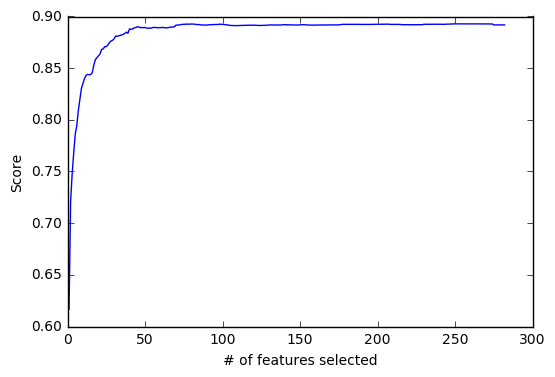

AFTER DEV RMSE: -0.142359707471


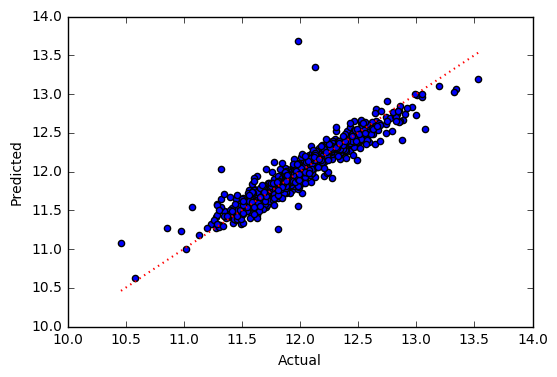

In [7]:
### Ridge Regression

clf = Ridge(alpha=10)
clf.fit(train, train_labels)
rmse = -np.sqrt(mean_squared_error(clf.predict(dev), dev_labels))
print("BEFORE DEV RMSE: " + str(rmse))
print
rfecv = RFECV(estimator=clf, step=1, cv=3)
rfecv.fit(fe_train, fe_train_labels)
print("Optimal # of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("# of features selected")
plt.ylabel("Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

feature_mask = rfecv.ranking_ == 1
local_dev = dev.iloc[:, feature_mask].copy()
local_train = train.iloc[:, feature_mask].copy()
clf.fit(local_train, train_labels)

dev_predict = clf.predict(local_dev)
rmse = -np.sqrt(mean_squared_error(dev_predict, dev_labels))
print("AFTER DEV RMSE: " + str(rmse))
Ridge_dev_predict = dev_predict

fig, ax = plt.subplots()
ax.scatter(dev_labels, Ridge_dev_predict)
ax.plot([dev_labels.min(), dev_labels.max()], [dev_labels.min(), dev_labels.max()], 'r:', linewidth=1.5, lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

reduced_fe_train = fe_train.iloc[:, feature_mask].copy()
clf = Ridge(alpha=10)
clf.fit(reduced_fe_train, fe_train_labels)
local_test = test.iloc[:, feature_mask].copy()
Ridge_test_predict = clf.predict(local_test)

BEFORE DEV RMSE: -0.139445393666

Optimal # of features : 75


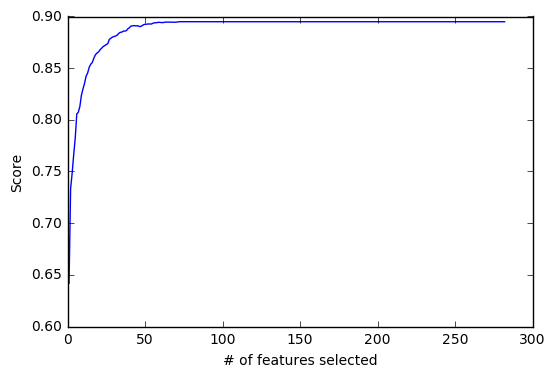

AFTER DEV RMSE: -0.137297768285


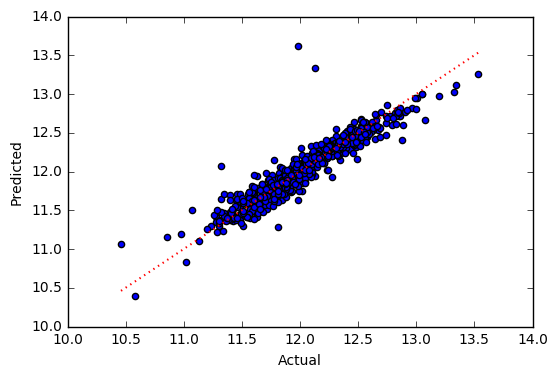

In [8]:
### Lasso Regression

clf = Lasso(alpha=0.001)
clf.fit(train, train_labels)
rmse = -np.sqrt(mean_squared_error(clf.predict(dev), dev_labels))
print("BEFORE DEV RMSE: " + str(rmse))
print
rfecv = RFECV(estimator=clf, step=1, cv=3)
rfecv.fit(fe_train, fe_train_labels)
print("Optimal # of features : %d" % rfecv.n_features_)

plt.figure()
plt.xlabel("# of features selected")
plt.ylabel("Score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

feature_mask = rfecv.ranking_ == 1
local_dev = dev.iloc[:, feature_mask].copy()
local_train = train.iloc[:, feature_mask].copy()
clf.fit(local_train, train_labels)

dev_predict = clf.predict(local_dev)
rmse = -np.sqrt(mean_squared_error(dev_predict, dev_labels))
print("AFTER DEV RMSE: " + str(rmse))
Lasso_dev_predict = dev_predict

fig, ax = plt.subplots()
ax.scatter(dev_labels, Lasso_dev_predict)
ax.plot([dev_labels.min(), dev_labels.max()], [dev_labels.min(), dev_labels.max()], 'r:', linewidth=1.5, lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

reduced_fe_train = fe_train.iloc[:, feature_mask].copy()
clf = Lasso(alpha=.001)
clf.fit(reduced_fe_train, fe_train_labels)
local_test = test.iloc[:, feature_mask].copy()
Lasso_test_predict = clf.predict(local_test)

In [9]:
dev_output_cols= {'Lasso_predict':Lasso_dev_predict, 
                  'Ridge_predict':Ridge_dev_predict, 
                  'Actual':dev_labels}
linear_dev_DF = pd.DataFrame(data=dev_output_cols)
print "OUTPUTTING TRAIN DATA: "
print "SIZE: ", linear_dev_DF.shape
print "COLS: ", linear_dev_DF.columns
print            
linear_dev_DF.to_csv('data/linear_out_dev.csv')

test_output_cols= {'Lasso_predict':Lasso_test_predict, 
                   'Ridge_predict':Ridge_test_predict}
linear_test_DF = pd.DataFrame(data=test_output_cols)
print "OUTPUTTING TEST DATA: "
print "SIZE: ", linear_test_DF.shape
print "COLS: ", linear_test_DF.columns
print            
linear_test_DF.to_csv('data/linear_out_test.csv')

OUTPUTTING TRAIN DATA: 
SIZE:  (730, 3)
COLS:  Index([u'Actual', u'Lasso_predict', u'Ridge_predict'], dtype='object')

OUTPUTTING TEST DATA: 
SIZE:  (1459, 2)
COLS:  Index([u'Lasso_predict', u'Ridge_predict'], dtype='object')

